<a href="https://colab.research.google.com/github/lasseufpa/ml4comm-icc21/blob/main/qam_awgn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ICC Tutorial - June 14, 2021 \
Tutorial 14: Machine Learning for MIMO Systems with Large Arrays, \
Aldebaro Klautau (UFPA), Nuria Gonzalez-Prelcic (NCSU) and Robert W. Heath Jr. (NCSU)

# QAM AWGN

In [15]:
# Clone the repository if running in Colab and install all the dependencies
if 'google.colab' in str(get_ipython()):
    import sys
    import os
    try:
      !git clone https://github.com/lasseufpa/ml4comm-icc21.git
    except:
      print("ml4comm-icc21 is already in the contents")
    !pip install -r /content/ml4comm-icc21/requirements.txt  &>/dev/null
    sys.path.append(os.path.abspath('/content/ml4comm-icc21'))

fatal: destination path 'ml4comm-icc21' already exists and is not an empty directory.


In [2]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import pandas as pd
import numpy as np
from commpy.channels import SISOFlatChannel

from ml4comm.qam_awgn import generate_symbols, qam_demod
from ml4comm.qam_analyzer import theoretical_ser
 
%load_ext autoreload
%autoreload 2
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
M            = 16      # QAM modulation
num_symbols  = 10000   # Number of transmitted symbols
SNR_dB       = 15      # Signal to noise ratio in dB     
code_rate    = 1       # Rate of the used code
Es           = 1       # Average symbol energy

In [10]:
# Generate the QAM symbols
symbs, indices = generate_symbols(num_symbols, M)

# AWGN channel
channel = SISOFlatChannel(None, (1 + 0j, 0j))
channel.set_SNR_dB(SNR_dB, float(code_rate), Es)
channel_output = channel.propagate(symbs)

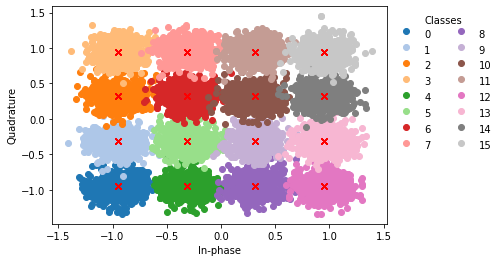

In [12]:
def plot_symbols():
    symbols = np.stack([np.real(channel_output), np.imag(channel_output)], axis=1)
    custom_cmap = cm.get_cmap('tab20')
    num_classes = M
    colors = custom_cmap.colors[:num_classes]
    levels = np.arange(num_classes + 2) - 0.5

    for ii in range(num_classes):
        selected_indices = np.argwhere(indices==ii)
        selected_indices = selected_indices.reshape((-1))
        plt.plot(symbols[selected_indices, 0], symbols[selected_indices, 1], 'o', color=colors[ii], label=f'{ii}')
        
    plt.plot(np.real(symbs), np.imag(symbs), 'rx')
    plt.legend(title='Classes', bbox_to_anchor=(1, 1), loc='upper left', ncol=2, handleheight=2, labelspacing=0.05, frameon=False)
    plt.ylabel('Quadrature')
    plt.xlabel('In-phase')

    plt.show()  
plot_symbols()

In [13]:
# QAM demodulation
symbols_demod = qam_demod(channel_output, M)

In [14]:
# Minimum theorical SER
theo_ser = theoretical_ser(M, SNR_dB)
print(f"Theoretical SER: \t{theo_ser:.2%}")

# SER
ser = np.sum(indices != symbols_demod)/len(indices)
print(f"Calculated SER: \t{ser:.2%}")

Theoretical SER: 	1.78%
Calculated SER: 	1.84%
